In [3]:
import numpy as np

In [4]:
# Load dataset
x_train_val = np.load('../../databases/x_train.npy')
y_train_val = np.load('../../databases/y_train.npy')
x_test = np.load('../../databases/x_test.npy')

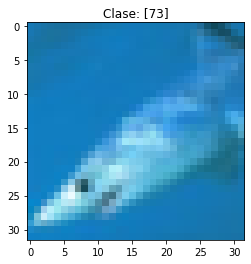

In [6]:
from matplotlib import pyplot as plt
#Mostramos alguna imágen
idx = 50
plt.imshow(x_train_val[idx])
plt.title(f'Clase: {y_train_val[idx]}')
plt.show()

In [7]:
#Dividimos entre train y validación
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val)

In [8]:
#Normalizamos
x_train_norm = x_train/255
x_val_norm = x_val/255
x_test_norm = x_test/255

In [9]:
#Armamos la red de clasificación
from tensorflow.keras.layers import Dense, Flatten, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

In [12]:
model = Sequential()
model.add(Conv2D(64,3, input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256,3))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(100, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer= Adam(learning_rate=0.001), metrics=["accuracy"])

In [11]:
model.fit(x_train_norm, y_train, batch_size = 256, validation_data = (x_val_norm, y_val), epochs=10)

Epoch 1/10
167/167 [==============================] - 100s 592ms/step - loss: 3.5398 - accuracy: 0.1723 - val_loss: 5.5194 - val_accuracy: 0.0247
Epoch 2/10
167/167 [==============================] - 100s 596ms/step - loss: 2.6958 - accuracy: 0.3227 - val_loss: 5.4081 - val_accuracy: 0.0453
Epoch 3/10
167/167 [==============================] - 90s 540ms/step - loss: 2.3332 - accuracy: 0.3993 - val_loss: 3.7520 - val_accuracy: 0.1625
Epoch 4/10
167/167 [==============================] - 79s 470ms/step - loss: 2.0952 - accuracy: 0.4523 - val_loss: 4.1737 - val_accuracy: 0.1764
Epoch 5/10
167/167 [==============================] - 78s 465ms/step - loss: 1.9950 - accuracy: 0.4742 - val_loss: 3.2458 - val_accuracy: 0.2651
Epoch 6/10
167/167 [==============================] - 77s 459ms/step - loss: 1.7615 - accuracy: 0.5287 - val_loss: 3.3963 - val_accuracy: 0.2689
Epoch 7/10
167/167 [==============================] - 77s 461ms/step - loss: 1.5814 - accuracy: 0.5707 - val_loss: 4.2792 - val_

In [13]:
model.fit(x_train_norm, y_train, batch_size = 256, validation_data = (x_val_norm, y_val), epochs=10)

Epoch 1/10
167/167 [==============================] - 81s 480ms/step - loss: 3.7332 - accuracy: 0.1388 - val_loss: 5.1378 - val_accuracy: 0.0253
Epoch 2/10
167/167 [==============================] - 93s 557ms/step - loss: 3.0134 - accuracy: 0.2563 - val_loss: 4.6100 - val_accuracy: 0.0304
Epoch 3/10
167/167 [==============================] - 84s 505ms/step - loss: 2.7012 - accuracy: 0.3206 - val_loss: 4.0722 - val_accuracy: 0.0755
Epoch 4/10
167/167 [==============================] - 85s 507ms/step - loss: 2.4841 - accuracy: 0.3653 - val_loss: 3.6039 - val_accuracy: 0.1419
Epoch 5/10
167/167 [==============================] - 88s 527ms/step - loss: 2.3408 - accuracy: 0.3927 - val_loss: 3.4239 - val_accuracy: 0.1891
Epoch 6/10
167/167 [==============================] - 86s 515ms/step - loss: 2.2107 - accuracy: 0.4207 - val_loss: 2.9953 - val_accuracy: 0.2843
Epoch 7/10
167/167 [==============================] - 85s 507ms/step - loss: 2.1020 - accuracy: 0.4450 - val_loss: 2.6643 - val_ac